In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os
import glob

In [3]:
class Output_Parser:
    def __init__(self, filename):
        self.size = 0
        # train
        self.train_iter = []
        self.train_loss = []
        self.train_nfe = []
        self.train_fnfe = []
        self.train_time_iter = []
        self.train_time = []
        # test
        self.test_iter = []
        self.test_loss = []
        self.test_acc = []
        self.test_nfe = []
        
        readfile = open(filename, 'r')
        readlines = readfile.readlines()
        for i, line in enumerate(readlines):
            # first 4 lines are misc output
            if i < 4:
                continue
            parsed_output = self.parseline(line)
            self.size +=1
            
            if parsed_output is not None:
                self.train_iter.append(parsed_output[0])
                self.train_loss.append(parsed_output[1])
                self.train_nfe.append(parsed_output[2])
                self.train_fnfe.append(parsed_output[3])
                self.train_time_iter.append(parsed_output[4])
                self.train_time.append(parsed_output[5])
        
    def parseline(self, row):
        row = row.split(" ")
        if row[0] == "Train||":
            train_iter = int(row[2])
            train_loss = float(row[5])
            train_nfe = float(row[8])
            train_fnfe = float(row[11])
            train_time_iter = float(row[14])
            train_time = float(row[17])
            return train_iter, train_loss, train_nfe, train_fnfe, train_time_iter, train_time
        else:
            return None
            

    def get(self):
        return {
            "train_iter": self.train_iter,
            "train_loss": self.train_loss,
            "train_nfe": self.train_nfe,
            "train_fnfe": self.train_fnfe,
            "train_bnfe": [self.train_nfe[i] - self.train_fnfe[i] for i in range(len(self.train_nfe))],
            "train_time_iter": self.train_time_iter,
            "train_time": self.train_time,
        }
    def get_df(self):
        return pd.DataFrame(self.get())

In [4]:
def calc_means(file_list, colName):
    data_list = [Output_Parser(file).get_df()[colName] for file in file_list]
    data_list = np.array(data_list)
    return data_list.mean(axis=0)

In [5]:
def plot_forwardnfe_epoch(y, x, ax=plt):
    XLAB_SIZE = 15
    YLAB_SIZE = 15
    ax.plot(y, x)
    ax.xlabel("Epoch", fontsize=XLAB_SIZE)
    ax.ylabel("NFE Forward", fontsize=YLAB_SIZE)
    ax.show()
    
def x_y_z(model):
    df = pd.DataFrame(make_stacks(glob.glob(f'./results/./results/./results/./results/./results/aix/{model}/*.txt'), "train_fnfe", "train_bnfe"))
    df = df.sort_values(by='tol')
    df.head()

    x = df.train_fnfe
    y = df.train_bnfe
    z = df.tol
    return x, y, z

In [6]:
def n2f(name):
    if name[-7:] == '1e0.txt':
        return [1e-0] * 40
    if name[-7:] == '1e1.txt':
        return [1e-1] * 40
    if name[-7:] == '1e2.txt':
        return [1e-2] * 40
    if name[-7:] == '1e3.txt':
        return [1e-3] * 40
    if name[-7:] == '1e4.txt':
        return [1e-4] * 40
    if name[-7:] == '1e5.txt':
        return [1e-5] * 40
    
def make_stacks(file_list, colName1, colName2):
    col1_stack = np.hstack([Output_Parser(file).get_df()[colName1] for file in file_list])
    col2_stack = np.hstack([Output_Parser(file).get_df()[colName2] for file in file_list])
    tol_name_stack = np.hstack([n2f(file) for file in file_list])
    return {colName1:col1_stack, colName2:col2_stack, 'tol':tol_name_stack}

In [7]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
BIGGEST_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [23]:
rec_names = ["iter", "loss", "f1", "nfe", "forwardnfe", "time/iter", "time"]


In [67]:
ghbnode_df = pd.read_csv(glob.glob('HeavyBallNODE/results/aix/tol/ghbnode/*.csv')[0],  header=None)
ghbnode_df.columns = rec_names
train_ghbnode = ghbnode_df[~ghbnode_df['forwardnfe'].isnull()].set_index('iter')
test_ghbnode = ghbnode_df[ghbnode_df['forwardnfe'].isnull()].set_index('iter')

hbnode_df = pd.read_csv(glob.glob('HeavyBallNODE/results/aix/tol/hbnode/*.csv')[0],  header=None)
hbnode_df.columns = rec_names
train_hbnode = hbnode_df[~hbnode_df['forwardnfe'].isnull()].set_index('iter')
test_hbnode = hbnode_df[hbnode_df['forwardnfe'].isnull()].set_index('iter')


sonode_df = pd.read_csv(glob.glob('HeavyBallNODE/results/aix/tol/sonode/*.csv')[0],  header=None)
sonode_df.columns = rec_names
train_sonode = sonode_df[~sonode_df['forwardnfe'].isnull()].set_index('iter')
test_sonode = sonode_df[sonode_df['forwardnfe'].isnull()].set_index('iter')


anode_df = pd.read_csv(glob.glob('HeavyBallNODE/results/aix/tol/anode/*.csv')[0],  header=None)
anode_df.columns = rec_names
train_anode = anode_df[~anode_df['forwardnfe'].isnull()].set_index('iter')
test_anode = anode_df[anode_df['forwardnfe'].isnull()].set_index('iter')

node_df = pd.read_csv(glob.glob('/workspace/HeavyBallNODE/results/aix/tol/node/*.csv')[0],  header=None)
node_df.columns = rec_names
train_node = node_df[~node_df['forwardnfe'].isnull()].set_index('iter')
test_node = node_df[node_df['forwardnfe'].isnull()].set_index('iter')

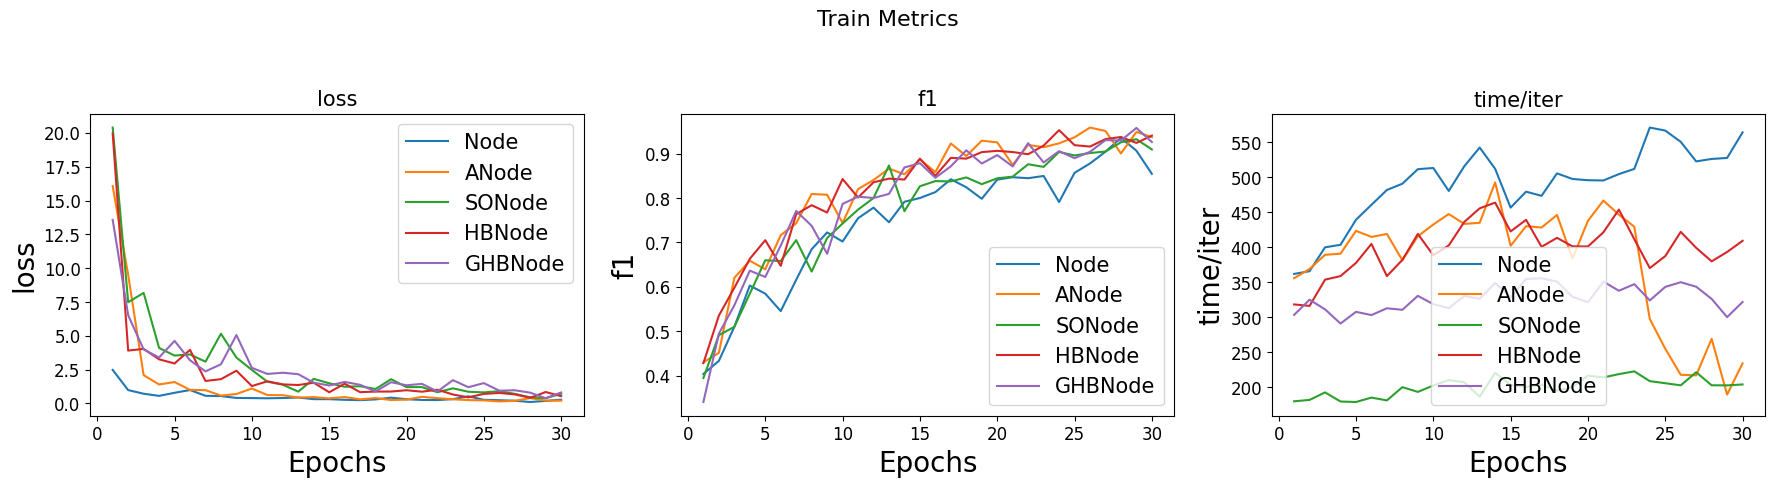

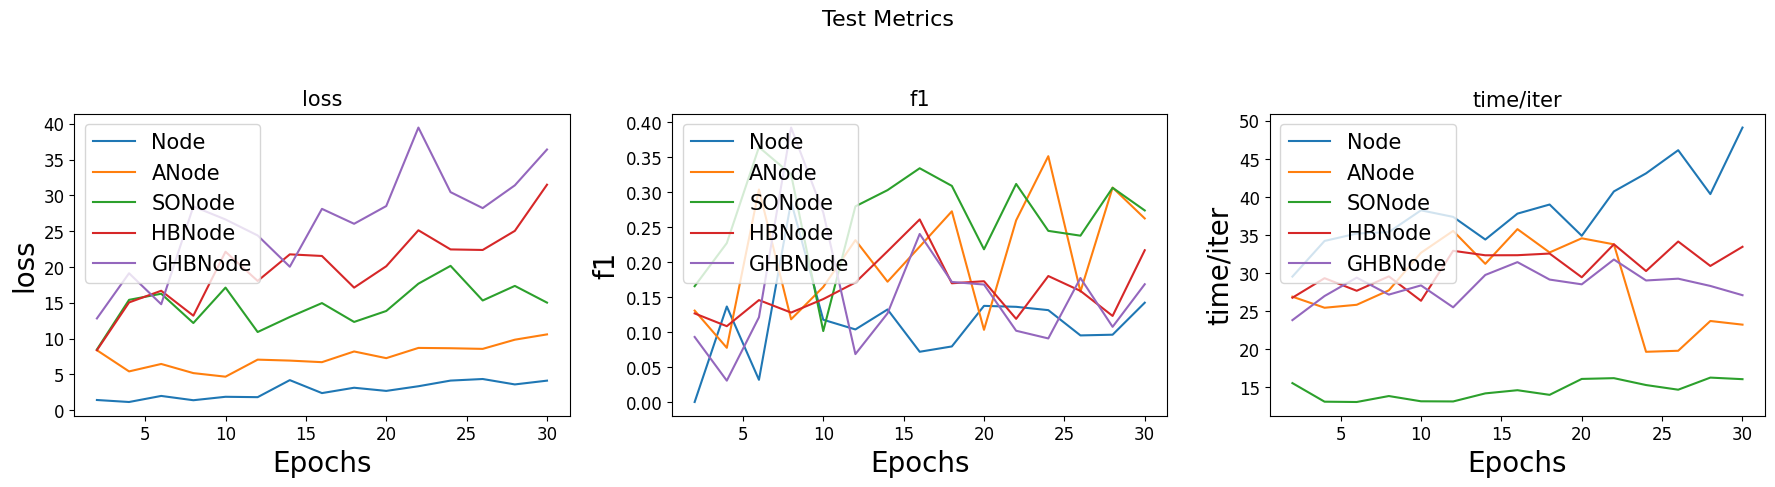

In [69]:
import matplotlib.pyplot as plt

# 데이터셋 정의
train_sets = {
    "Node": train_node,
    "ANode": train_anode,
    "SONode": train_sonode,
    "HBNode": train_hbnode,
    "GHBNode": train_ghbnode,
}

test_sets = {
    "Node": test_node,
    "ANode": test_anode,
    "SONode": test_sonode,
    "HBNode": test_hbnode,
    "GHBNode": test_ghbnode,
}

metrics = ["loss", "f1", "time/iter"]

# Train 데이터 플롯
fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5))
fig.suptitle("Train Metrics", fontsize=16)

for i, name in enumerate(metrics):
    for label, train_set in train_sets.items():
        axs[i].plot(train_set[name], label=label)
    axs[i].set_title(name)
    axs[i].set_xlabel("Epochs")
    axs[i].set_ylabel(name)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for suptitle
plt.show()

# Test 데이터 플롯
fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5))
fig.suptitle("Test Metrics", fontsize=16)

for i, name in enumerate(metrics):
    for label, test_set in test_sets.items():
        axs[i].plot(test_set[name], label=label)
    axs[i].set_title(name)
    axs[i].set_xlabel("Epochs")
    axs[i].set_ylabel(name)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for suptitle
plt.show()


/tmp/ipykernel_2206819/1896151659.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(x, y, cmap='rainbow', s=100)


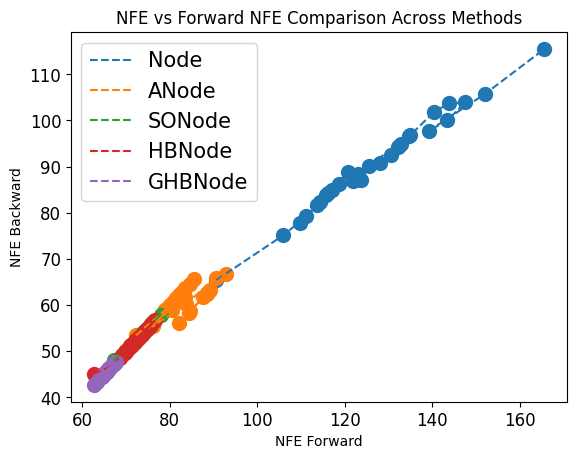

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Train 데이터셋들 (nfe, forwardnfe, tol 컬럼이 존재한다고 가정)
train_sets = {
    "Node": train_node,
    "ANode": train_anode,
    "SONode": train_sonode,
    "HBNode": train_hbnode,
    "GHBNode": train_ghbnode,
}

# 플롯 설정
title = "NFE vs Forward NFE Comparison Across Methods"
# 각 데이터셋에 대해 플롯 생성
for label, df in train_sets.items():
    x = df['forwardnfe']
    y = df['nfe']
    # 산점도 그리기
    sc = plt.scatter(x, y, cmap='rainbow', s=100)
    plt.plot(x, y, linestyle='--', label=label)  # 대각선 추가

    # 축 및 제목 설정
    plt.title(title, fontsize=12)
    plt.xlabel("NFE Forward", fontsize=10)
    plt.ylabel("NFE Backward", fontsize=10)
plt.legend()
plt.show()
